In [7]:
from utilities import generate_multiscale_grf_data
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
# --------------------------------------
# Configuration
# --------------------------------------
# N_samples: int, T: float = 1.0, N_constraints: int = 5, resolution: int = 32,
    # L_domain: float = 1.0, micro_corr_length: float = 0.1, H_max_factor: float = 0.5,
    # mean_val: float = 10.0, std_val: float = 2.0, covariance_type: str = "exponential",
    # device: str = 'cpu', generation_method: str = 'fft', kl_error_threshold: float = 1e-3
    
N_samples = 128
T = 1.0
N_constraints = 5
resolution = 64
L_domain = 1.0
micro_corr_length = 0.05
H_max_factor = 0.6
covariance_type = "exponential"
mean_val = 10.0
std_val = 2.0
device = 'cpu'
generation_method = 'kl'
kl_error_threshold = 1e-3
# --------------------------------------

In [14]:
# generate data
# set same seed for reproducibility
np.random.seed(42)
marginal_data, dim = generate_multiscale_grf_data(N_samples=N_samples, T=T, N_constraints=N_constraints, resolution=resolution,
                                   L_domain=L_domain, micro_corr_length=micro_corr_length, H_max_factor=H_max_factor,
                                   mean_val=mean_val, std_val=std_val, covariance_type=covariance_type,
                                   device=device, generation_method=generation_method, kl_error_threshold=kl_error_threshold)


--- Generating Multiscale GRF Data (Resolution: 64x64, Method: KL) ---
Generating base microscopic fields (t=0)...
Computing KL decomposition for l=0.05...
KL decomposition truncated to 4066 components.


100%|██████████| 128/128 [00:00<00:00, 397.35it/s]


Applying progressive coarsening filters...
H Schedule: ['0.0000', '0.1875', '0.2763', '0.4072', '0.6000']
  t=0.00: H=0.0000, Mean Std Dev across field: 1.9908
  t=0.25: H=0.1875, Mean Std Dev across field: 1.1919
  t=0.50: H=0.2763, Mean Std Dev across field: 0.9847
  t=0.75: H=0.4072, Mean Std Dev across field: 0.7697
  t=1.00: H=0.6000, Mean Std Dev across field: 0.5762
Multiscale data generation complete.


In [15]:
times = np.linspace(0, T, N_constraints)
# check if key present in dictionary `marginal_data`
print(f"Dimension of the data: {dim}")
print(f"Length of dictionary: {len(marginal_data)}")
print(f"Keys in the dictionary: {marginal_data.keys()}")

Dimension of the data: 4096
Length of dictionary: 5
Keys in the dictionary: dict_keys([0.0, 0.25, 0.5, 0.75, 1.0])


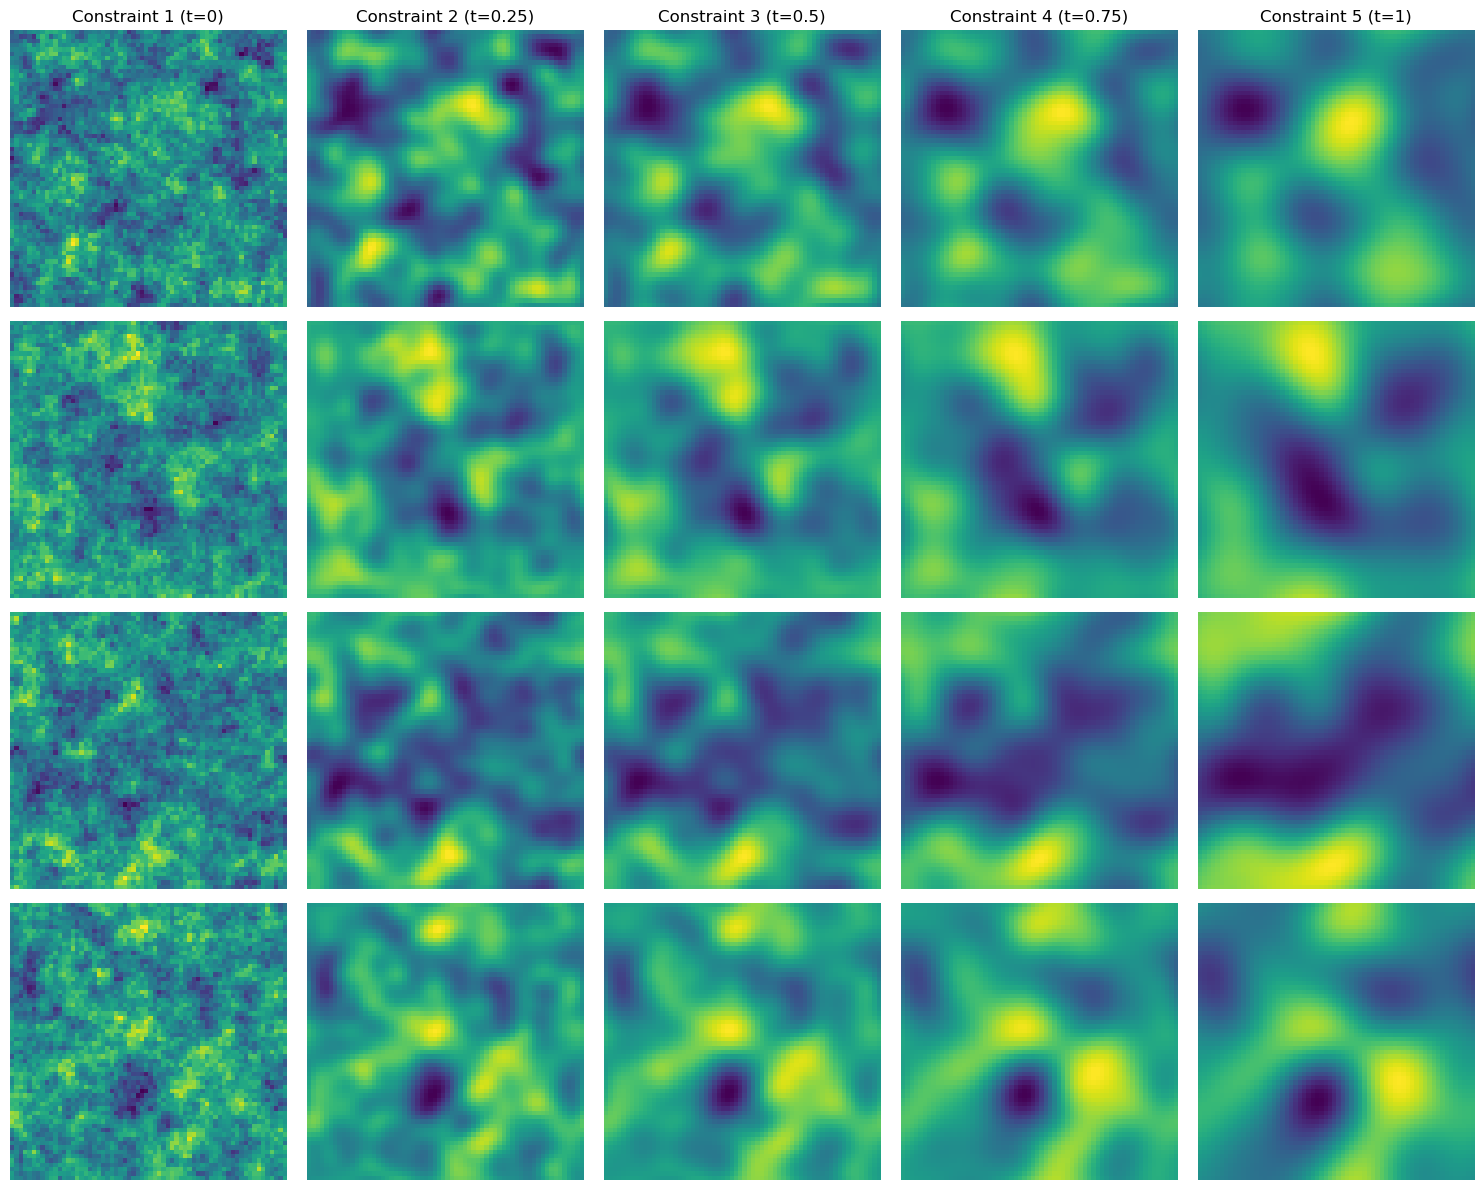

In [16]:
# visualize some samples, `marginal_data` has shape (N_constraints, N_samples, resolution*resolution)`
# visualize 4 samples (rows) across all constraints (columns)
n_rows = 4
n_cols = N_constraints
sample_indices = np.random.choice(N_samples, size=n_rows, replace=False)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))

for r, sidx in enumerate(sample_indices):
    for c, t in enumerate(times):
        ax = axes[r, c]
        img = marginal_data[t][sidx].reshape(resolution, resolution).numpy()
        ax.imshow(img, cmap='viridis')
        if r == 0:
            ax.set_title(f'Constraint {c+1} (t={t:g})')
        if c == 0:
            ax.set_ylabel(f'Sample {sidx+1}')
        ax.axis('off')

plt.tight_layout()
plt.show()



--- Generating Multiscale GRF Data (Resolution: 64x64, Method: KL) ---
Generating base microscopic fields (t=0)...
Computing KL decomposition for l=0.15...


KL decomposition truncated to 4005 components.


100%|██████████| 128/128 [00:00<00:00, 462.48it/s]


Applying progressive coarsening filters...
H Schedule: ['0.0000', '0.1875', '0.2763', '0.4072', '0.6000']
  t=0.00: H=0.0000, Mean Std Dev across field: 2.0011
  t=0.25: H=0.1875, Mean Std Dev across field: 1.6160
  t=0.50: H=0.2763, Mean Std Dev across field: 1.4742
  t=0.75: H=0.4072, Mean Std Dev across field: 1.2912
  t=1.00: H=0.6000, Mean Std Dev across field: 1.0828
Multiscale data generation complete.


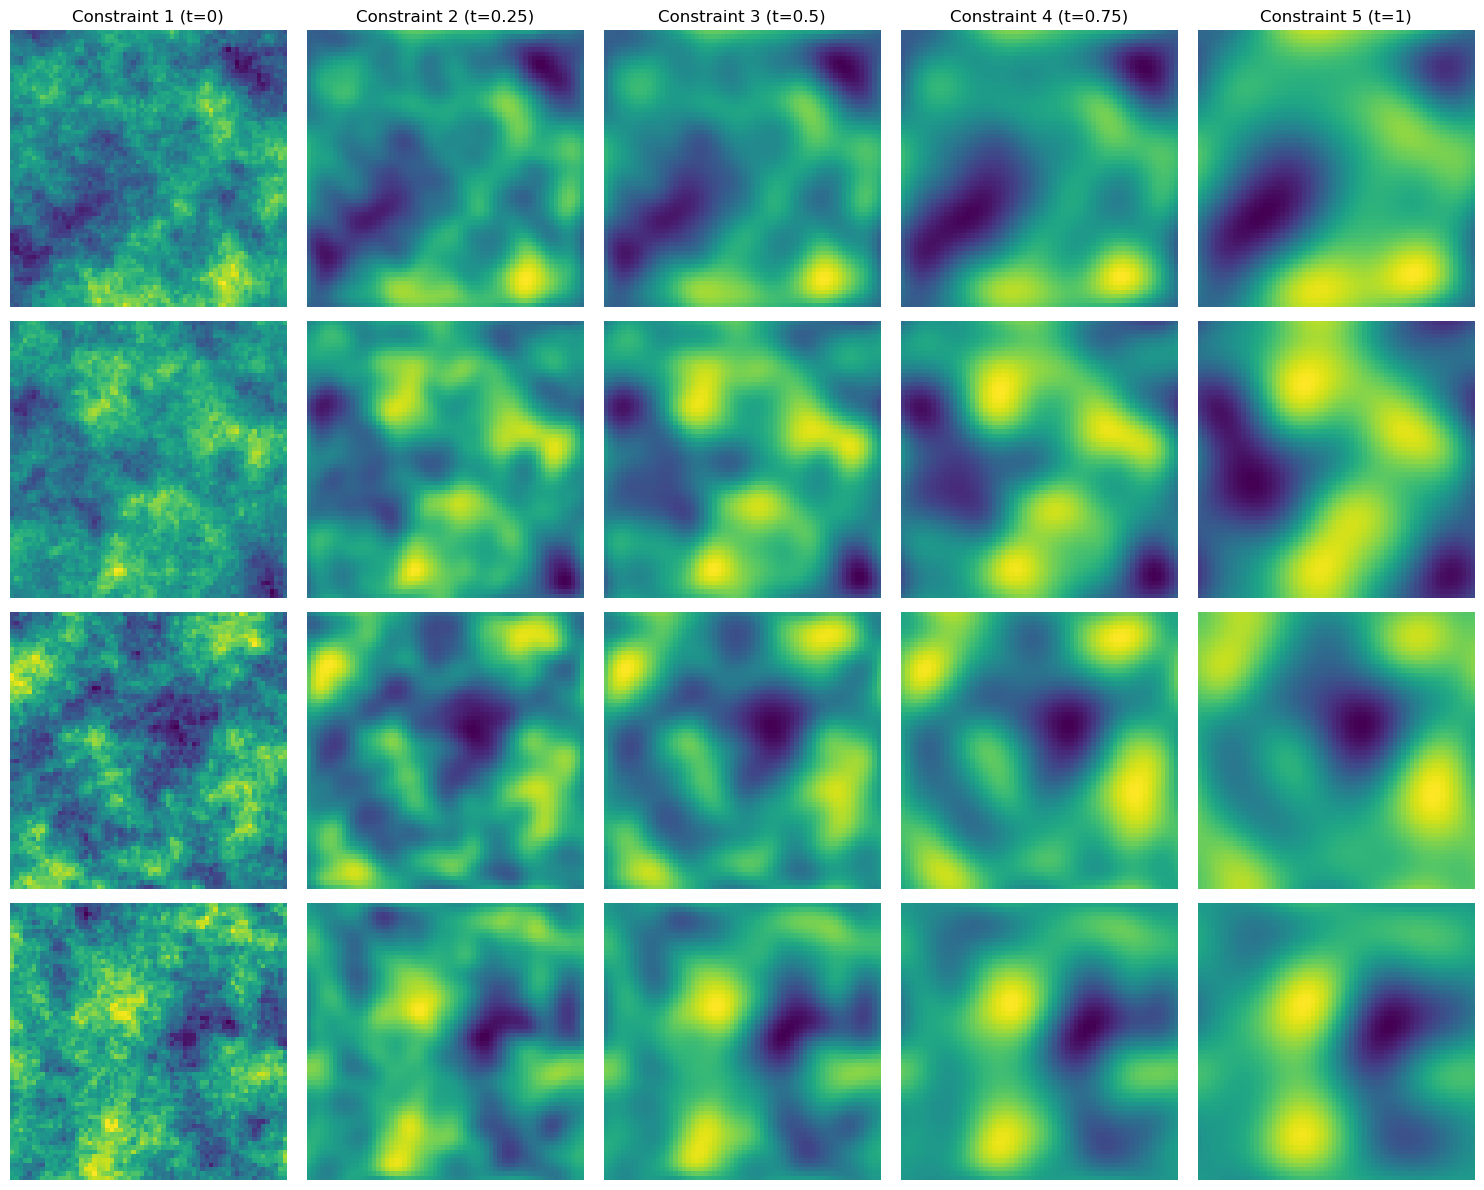

In [17]:
# reset seed ensure that data is same as above
np.random.seed(42)

# corr length = 0.1
micro_corr_length = 0.15
marginal_data, dim = generate_multiscale_grf_data(N_samples=N_samples, T=T, N_constraints=N_constraints, resolution=resolution,
                                   L_domain=L_domain, micro_corr_length=micro_corr_length, H_max_factor=H_max_factor,
                                   mean_val=mean_val, std_val=std_val, covariance_type=covariance_type,
                                   device=device, generation_method=generation_method, kl_error_threshold=kl_error_threshold)
times = np.linspace(0, T, N_constraints)
# visualize some samples, `marginal_data` has shape (N_constraints, N_samples, resolution*resolution)`
# visualize 4 samples (rows) across all constraints (columns)
n_rows = 4
n_cols = N_constraints
sample_indices = np.random.choice(N_samples, size=n_rows, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))
for r, sidx in enumerate(sample_indices):
    for c, t in enumerate(times):
        ax = axes[r, c]
        img = marginal_data[t][sidx].reshape(resolution, resolution).numpy()
        ax.imshow(img, cmap='viridis')
        if r == 0:
            ax.set_title(f'Constraint {c+1} (t={t:g})')
        if c == 0:
            ax.set_ylabel(f'Sample {sidx+1}')
        ax.axis('off')
plt.tight_layout()
plt.show()


--- Generating Multiscale GRF Data (Resolution: 64x64, Method: KL) ---
Generating base microscopic fields (t=0)...
Computing KL decomposition for l=0.035...
KL decomposition truncated to 991 components.


100%|██████████| 128/128 [00:00<00:00, 8256.88it/s]

Applying progressive coarsening filters...
H Schedule: ['0.0000', '0.1875', '0.2763', '0.4072', '0.6000']
  t=0.00: H=0.0000, Mean Std Dev across field: 1.9927
  t=0.25: H=0.1875, Mean Std Dev across field: 1.2048
  t=0.50: H=0.2763, Mean Std Dev across field: 0.9213
  t=0.75: H=0.4072, Mean Std Dev across field: 0.6638
  t=1.00: H=0.6000, Mean Std Dev across field: 0.4667
Multiscale data generation complete.


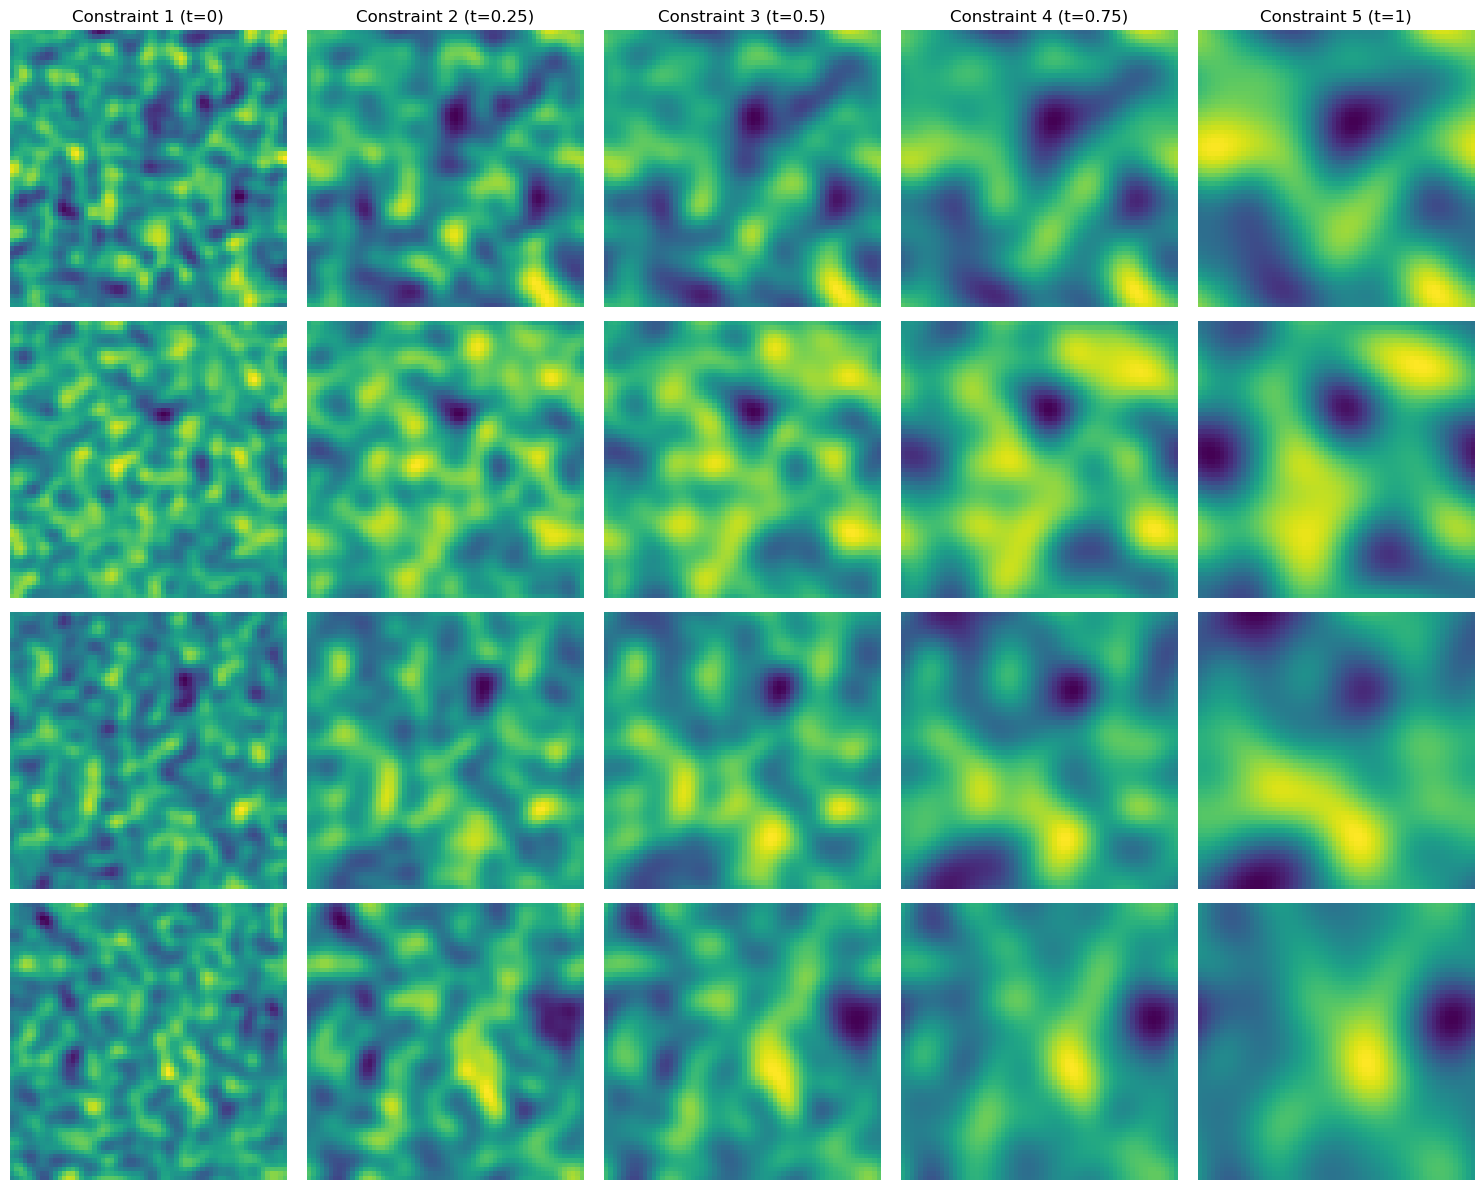

In [25]:
# try gaussian covariance
np.random.seed(42)
covariance_type = "gaussian"
micro_corr_length = 0.035
marginal_data, dim = generate_multiscale_grf_data(N_samples=N_samples, T=T, N_constraints=N_constraints, resolution=resolution,
                                   L_domain=L_domain, micro_corr_length=micro_corr_length, H_max_factor=H_max_factor,
                                   mean_val=mean_val, std_val=std_val, covariance_type=covariance_type,
                                   device=device, generation_method=generation_method, kl_error_threshold=kl_error_threshold)
times = np.linspace(0, T, N_constraints)
# visualize some samples, `marginal_data` has shape (N_constraints, N_samples, resolution*resolution)`
# visualize 4 samples (rows) across all constraints (columns)
n_rows = 4
n_cols = N_constraints
sample_indices = np.random.choice(N_samples, size=n_rows, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))
for r, sidx in enumerate(sample_indices):
    for c, t in enumerate(times):
        ax = axes[r, c]
        img = marginal_data[t][sidx].reshape(resolution, resolution).numpy()
        ax.imshow(img, cmap='viridis')
        if r == 0:
            ax.set_title(f'Constraint {c+1} (t={t:g})')
        if c == 0:
            ax.set_ylabel(f'Sample {sidx+1}')
        ax.axis('off')
plt.tight_layout()
plt.show()


--- Generating Multiscale GRF Data (Resolution: 64x64, Method: KL) ---
Generating base microscopic fields (t=0)...
Computing KL decomposition for l=0.045...
KL decomposition truncated to 615 components.


100%|██████████| 128/128 [00:00<00:00, 13613.04it/s]

Applying progressive coarsening filters...
H Schedule: ['0.0000', '0.1875', '0.2763', '0.4072', '0.6000']
  t=0.00: H=0.0000, Mean Std Dev across field: 1.9939
  t=0.25: H=0.1875, Mean Std Dev across field: 1.3704
  t=0.50: H=0.2763, Mean Std Dev across field: 1.0840
  t=0.75: H=0.4072, Mean Std Dev across field: 0.7975
  t=1.00: H=0.6000, Mean Std Dev across field: 0.5671
Multiscale data generation complete.


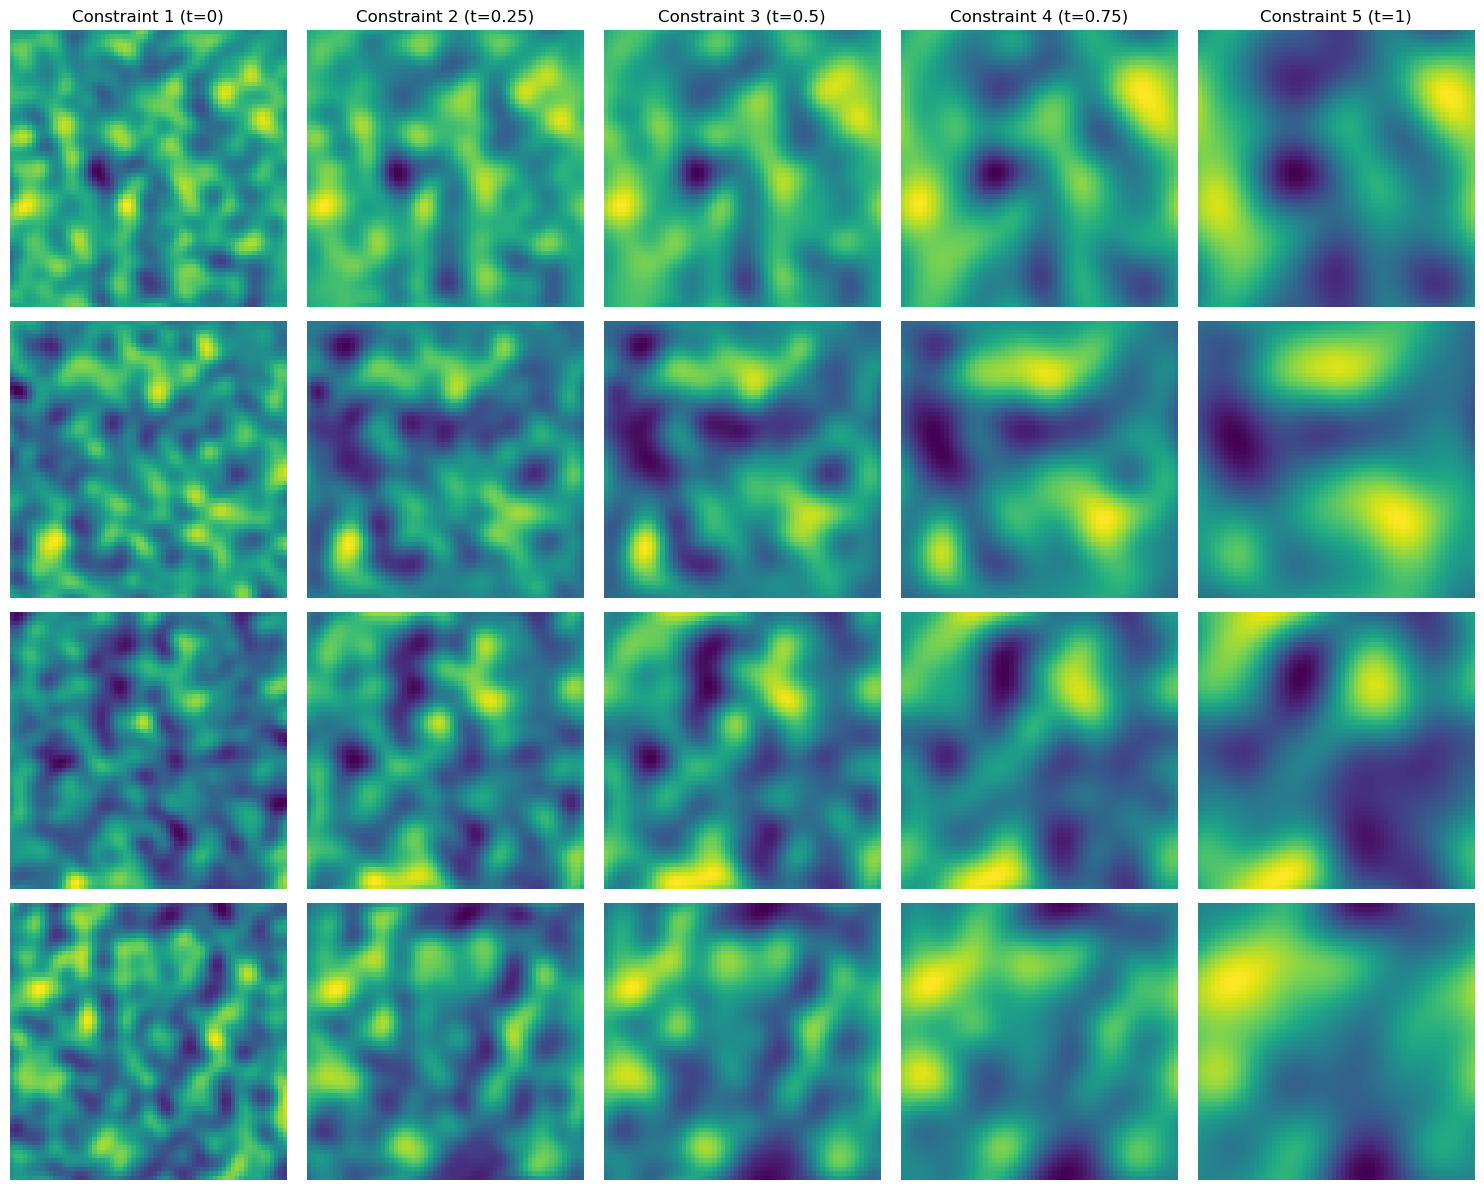

In [28]:
# correlation length = 0.15
np.random.seed(42)
covariance_type = "gaussian"
micro_corr_length = 0.045
marginal_data, dim = generate_multiscale_grf_data(N_samples=N_samples, T=T, N_constraints=N_constraints, resolution=resolution,
                                   L_domain=L_domain, micro_corr_length=micro_corr_length, H_max_factor=H_max_factor,
                                   mean_val=mean_val, std_val=std_val, covariance_type=covariance_type,
                                   device=device, generation_method=generation_method, kl_error_threshold=kl_error_threshold)
times = np.linspace(0, T, N_constraints)
# visualize some samples, `marginal_data` has shape (N_constraints, N_samples, resolution*resolution)`
# visualize 4 samples (rows) across all constraints (columns)
n_rows = 4
n_cols = N_constraints
sample_indices = np.random.choice(N_samples, size=n_rows, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))
for r, sidx in enumerate(sample_indices):
    for c, t in enumerate(times):
        ax = axes[r, c]
        img = marginal_data[t][sidx].reshape(resolution, resolution).numpy()
        ax.imshow(img, cmap='viridis')
        if r == 0:
            ax.set_title(f'Constraint {c+1} (t={t:g})')
        if c == 0:
            ax.set_ylabel(f'Sample {sidx+1}')
        ax.axis('off')
plt.tight_layout()
plt.show()